Exploratory Data Analysis of Renewables Stats 2024. 
Dataset provided by irena.org 

In [1]:
import os;
os.listdir ('/kaggle/input')

['southeast-asia-renewables-report']

In [2]:
# import libraries
import pandas as pd 
import geopandas as gpd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import folium 

In [3]:
df = pd.read_excel ('/kaggle/input/southeast-asia-renewables-report/Southeast Asia Renewables.xlsx')
df

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.570,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.449,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.764,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.253,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           4942 non-null   object 
 1   Sub-region                                       4942 non-null   object 
 2   Country                                          4942 non-null   object 
 3   ISO3 code                                        4942 non-null   object 
 4   M49 code                                         4942 non-null   int64  
 5   RE or Non-RE                                     4942 non-null   object 
 6   Group Technology                                 4942 non-null   object 
 7   Technology                                       4942 non-null   object 
 8   Sub-Technology                                   4942 non-null   object 
 9   Producer Type                 

In [5]:
df.describe()

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
count,4942.000000,4942.000000,2340.000000,2580.000000,0.0,90.000000,97.000000,412.000000,665.000000,464.000000,1518.000000
mean,465.198705,2012.725415,7495.379945,1754.126816,NaN,221.558474,45706.350802,208.317317,84.270997,49.526185,16.657140
std,234.279222,6.594822,20112.778943,4505.036610,NaN,392.940883,94800.232672,1005.735085,313.015502,176.209351,76.731536
min,96.000000,2000.000000,-156.092000,0.001000,NaN,0.108300,53.893500,0.168000,0.000303,0.010000,0.000000
25%,360.000000,2007.000000,10.858500,7.825000,NaN,1.251150,1069.110400,9.715915,0.130575,0.197500,0.000000
50%,458.000000,2013.000000,241.114500,98.100000,NaN,45.923475,8658.218000,40.428475,1.276388,1.465000,0.000113
75%,702.000000,2018.000000,3587.666500,949.000000,NaN,137.178575,18266.764300,158.684479,20.691264,14.720000,3.991158
max,764.000000,2023.000000,205907.000000,50006.370000,NaN,1326.078250,325287.454000,12569.753440,3496.094980,2316.890000,1259.448368


In [6]:
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.57,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.45,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.76,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.25,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(columns = ['Region', 'Sub-region'], inplace = True)
df

,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.57,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.45,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.76,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.25,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Country                                               0
ISO3 code                                             0
M49 code                                              0
RE or Non-RE                                          0
Group Technology                                      0
Technology                                            0
Sub-Technology                                        0
Producer Type                                         0
Year                                                  0
Electricity Generation (GWh)                       2602
Electricity Installed Capacity (MW)                2362
Heat Generation (TJ)                               4942
Off-grid Biogas for Cooking (1,000 inhabitants)    4852
Off-grid Biogas Production (1,000 m3)              4845
Off-grid Electricity Access (1,000 inhabitants)    4530
Public Flows (2021 USD M)                          4277
SDG 7a1 Intl. Public Flows (2021 USD M)            4478
SDG 7b1 RE capacity per capita (W/inhabitant)   

In [9]:
df.nunique()

Country                                              11
ISO3 code                                            11
M49 code                                             11
RE or Non-RE                                          2
Group Technology                                     11
Technology                                           21
Sub-Technology                                       35
Producer Type                                         3
Year                                                 24
Electricity Generation (GWh)                       1853
Electricity Installed Capacity (MW)                1304
Heat Generation (TJ)                                  0
Off-grid Biogas for Cooking (1,000 inhabitants)      78
Off-grid Biogas Production (1,000 m3)                73
Off-grid Electricity Access (1,000 inhabitants)     227
Public Flows (2021 USD M)                           657
SDG 7a1 Intl. Public Flows (2021 USD M)             317
SDG 7b1 RE capacity per capita (W/inhabitant)   

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_24/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [11]:
iso3_code_list = df['ISO3 code'].unique().tolist()
iso3_code_list

['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM']

In [12]:
data = {
    'ISO3 code': ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM'],
    'Electricity Generation (GWh)' : [939.1962717391305, 400.46008499999994, 13263.089896551724, 3622.714759615385, 9342.047349514563, 1470.8286285714285, 5581.224668852459, 7332.856985915493, 11293.065897832817, 70.93717441860464, 12613.15220361991]
}

In [13]:
df1= pd.DataFrame(data)

In [14]:
fig = px.choropleth(df1, locations = 'ISO3 code', color = 'Electricity Generation (GWh)',
                   hover_name ='ISO3 code',
color_continuous_scale = px.colors.sequential.Plasma)
fig.show()

In [15]:
df2 = df.groupby('Country')[['Electricity Generation (GWh)','Electricity Installed Capacity (MW)']].mean(['Country']).sort_values(by = 'Country', ascending = True)
df2

,Electricity Generation (GWh),Electricity Installed Capacity (MW)
Country,,
Brunei Darussalam,939.20,219.54
Cambodia,400.46,146.92
Indonesia,13263.09,3144.64
Lao People's Democratic Republic (the),3622.71,774.73
Malaysia,9342.05,1986.93
Myanmar,1470.83,413.81
Philippines (the),5581.22,1334.09
Singapore,7332.86,1746.04
Thailand,11293.07,2463.97


In [16]:
country_list = df['Country'].unique().tolist()
country_list

['Brunei Darussalam',
 'Cambodia',
 'Indonesia',
 "Lao People's Democratic Republic (the)",
 'Malaysia',
 'Myanmar',
 'Philippines (the)',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Viet Nam']

In [17]:
egeneration_list = df2['Electricity Generation (GWh)'].tolist()
egeneration_list

[939.1962717391305,
 400.46008499999994,
 13263.089896551724,
 3622.714759615385,
 9342.047349514563,
 1470.8286285714285,
 5581.224668852459,
 7332.856985915493,
 11293.065897832817,
 70.93717441860464,
 12613.15220361991]

In [18]:
capacityinstalled_list = df2['Electricity Installed Capacity (MW)'].tolist()
capacityinstalled_list

[219.54443,
 146.9212641509434,
 3144.6365284552844,
 774.7287615384615,
 1986.9299403409093,
 413.80701339285713,
 1334.0888746355686,
 1746.0381315789473,
 2463.9723351800553,
 47.46611458333333,
 3329.1562946058093]

In [19]:
#    'Country':['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic (the)", 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam'], 
#    'Electricity Generation (GWh)': [939.1962717391305, 400.46008499999994, 13263.089896551724, 3622.714759615385, 9342.047349514563, 1470.8286285714285, 5581.224668852459, 7332.856985915493, 11293.065897832817, 70.93717441860464, 12613.15220361991],
#    'Electricity Installed Capacity (MW)': [219.54443, 146.9212641509434, 3144.6365284552844, 774.7287615384615, 1986.9299403409093, 413.80701339285713, 1334.0888746355686, 1746.0381315789473, 2463.9723351800553, 47.46611458333333, 3329.1562946058093]
#    'Latitude':[4.30, 13.00, 5.00, 18.00, 2.30, 19.07, 13.00, 1.31, 15.87, -8.87, 14.05],
#    'Longitude':[114.40, 105.00, 120.00, 105.00, 112.30, 96.67, 122.00, 103.84, 100.99, 125.72, 108.27 ]}

In [20]:
data1 ={
    'Country':['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic (the)", 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam'], 
    'Electricity Installed Capacity (MW)': [219.54443, 146.9212641509434, 3144.6365284552844, 774.7287615384615, 1986.9299403409093, 413.80701339285713, 1334.0888746355686, 1746.0381315789473, 2463.9723351800553, 47.46611458333333, 3329.1562946058093],
    'Latitude':[4.31, 12.56, -0.78, 18.00, 2.30, 19.07, 13.00, 1.31, 15.87, -8.87, 14.05],
    'Longitude':[114.43, 105.00, 113.92, 105.00, 112.30, 96.67, 122.00, 103.84, 100.99, 125.72, 108.27 ]}
df3 = pd.DataFrame(data1)

In [21]:
m = folium.Map(location = [20,0], zoom_start = 2)

In [22]:
for idx, row in df3.iterrows():
    folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        popup = f"{row['Country']}:{row['Electricity Installed Capacity (MW)']}MW",
        icon = folium.Icon (color = 'blue')).add_to(m)

In [23]:
m.save('southeast_asia_electricity_installed_capacity_map.html')
m

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


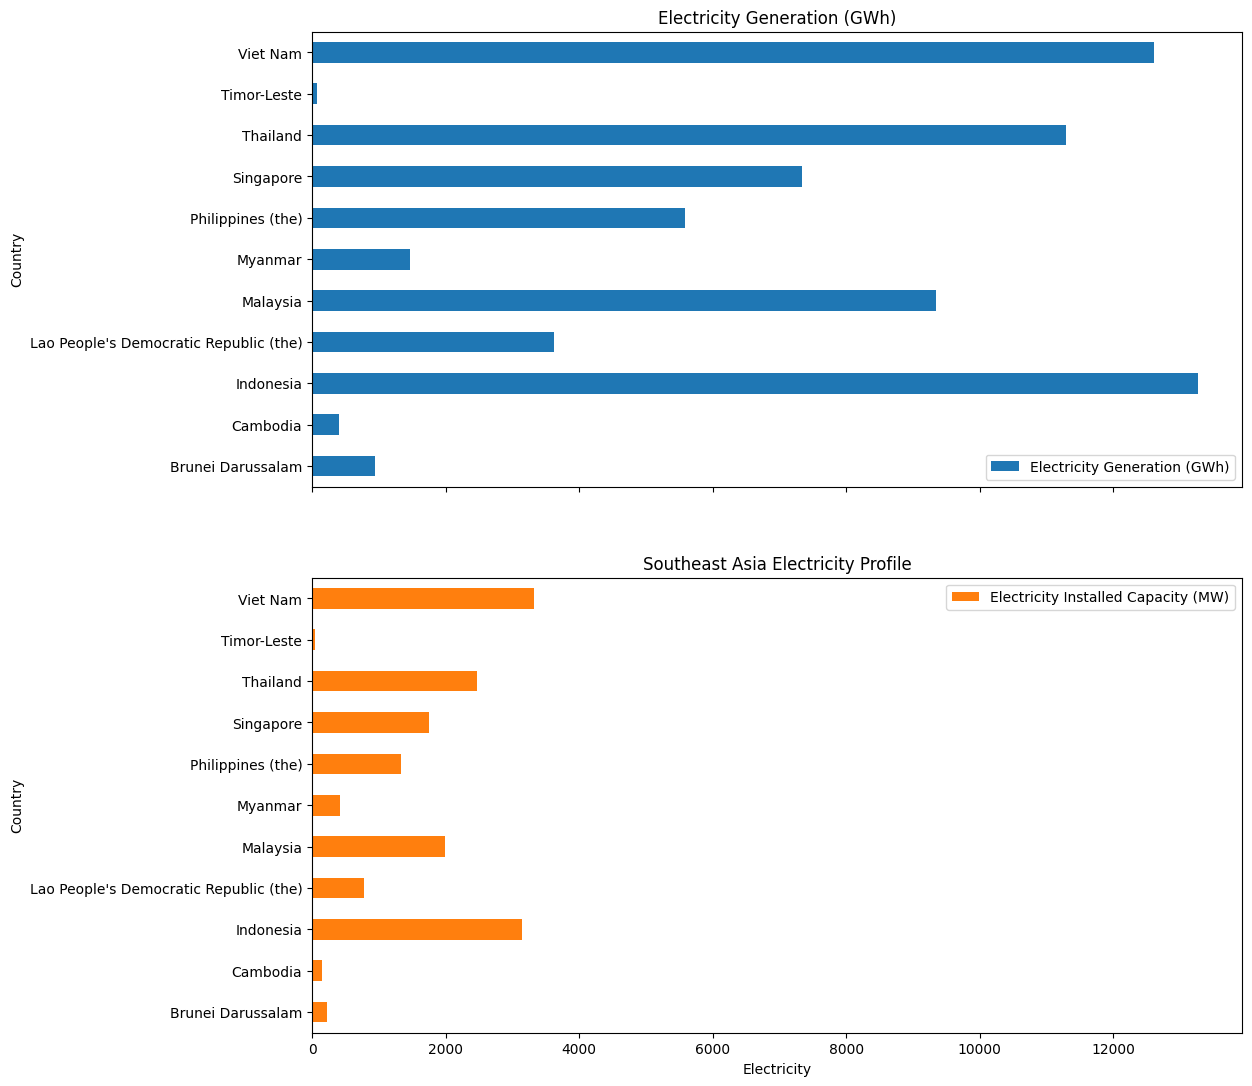

In [25]:
df2.plot(kind = 'barh', xlabel ='Electricity', ylabel = 'Country', subplots = True,  figsize = (12,13))
plt.title('Southeast Asia Electricity Profile', color ='black', loc= 'center')
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')
plt.style.use('grayscale')